# An optimization problem using the Rosenbrock function

Notebook for applying the unconstrained minimization of the two-variable Rosenbrock function.

$$ f(p_1,p_2) = 100 (p_2 - p_1^2)^2 + (1- p_1)^2$$ 

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from visual import histeq

## Defining functions

In [2]:
def rosenbrock(x,y):
    '''
    Calculate the rosenbrock function.   
    
    '''
    p1 = x
    p2 = y
    z = 100.*(p2-p1**2)**2 + (1.- p1)**2
    return z

In [3]:
def rosenbrock_grad(x,y):
    '''
    Calculate the gradient of rosenbrock function.
    '''
    p1 = x
    p2 = y
    J1 = -400.*p1*(p2-p1**2) - 2.*(1.- p1)
    J2 = 200.*(p2-p1**2)
    J = np.array([J1,J2])
    return J

## Parameters for calculating the rosenbrock function 

In [4]:
Nx = 20
Ny = 20

In [5]:
x = np.linspace(-5.,5.,num=Nx)
y = np.linspace(-10.,10.,num=Ny)
X,Y = np.meshgrid(x,y)

In [6]:
Z = rosenbrock(X,Y) 

In [7]:
Z_eq = histeq(Z).reshape(Nx,Ny)

## Visuatization of the function 


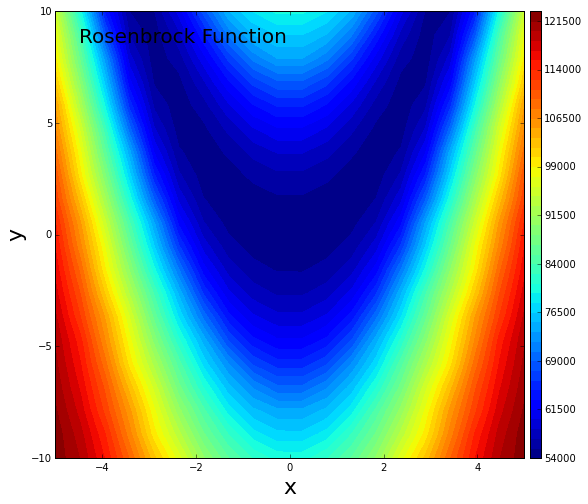

In [8]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_eq, 50)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('Rosenbrock Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()


## Calculating the Steepest Descent without backtracking

In [9]:
itmax = 50000

px = []
py = []

px0 = -1.
py0 = 7.

px.append(px0)
py.append(py0)

phi = []
it = []
for i in range(itmax):
    lamb = 0.0001
    
    dx = rosenbrock_grad(px[i],py[i])[0]
    dy = rosenbrock_grad(px[i],py[i])[1]
    
    f_pi = rosenbrock(px[i],py[i])
    
    px.append(px[i] - lamb*dx)
    py.append(py[i] - lamb*dy)
    
    f_plus = rosenbrock(px[i+1],py[i+1])
    
    phi.append(f_plus)
    it.append(i)
    
    #print 'iteration:', i
    #print 'p1 = %.2f | p2 = %.2f' % (px[i],py[i])
    #print 'Rosenbrock value:', f_pi


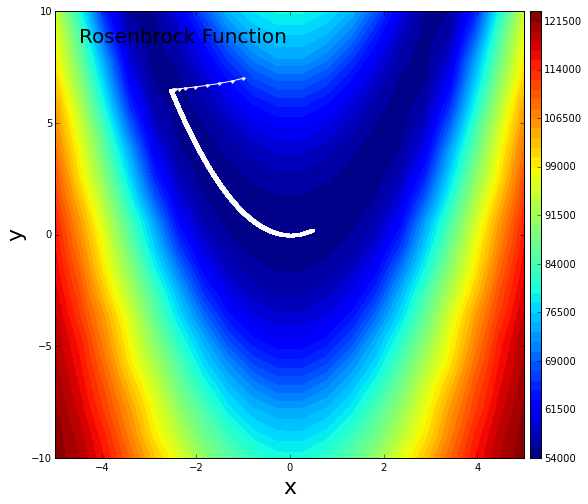

In [10]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_eq, 50)
plt.plot(px,py,'w.-')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('Rosenbrock Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()

## Calculating the Steepest Descent with Armijo condition

In [11]:
alpha = 1e-4
beta =  0.4
itmax = 50000

px = []
py = []

px0 = -1.
py0 = 7.

px.append(px0)
py.append(py0)

phi_armi = []
it_armi = []
for i in range(itmax):
    m = 0
    lamb = 1
    
    dx = rosenbrock_grad(px[i],py[i])[0]
    dy = rosenbrock_grad(px[i],py[i])[1]
    
    mod = dx**2 + dy**2
    
    px.append(px[i] - lamb*dx)
    py.append(py[i] - lamb*dy)
    
    f_pi = rosenbrock(px[i],py[i])
    
    f_plus = rosenbrock(px[i+1],py[i+1])
    
    phi_armi.append(f_plus)
    it_armi.append(i)
    
    #print 'iteration:', i
    #print 'p1 = %.2f | p2 = %.2f' % (px[i],py[i])
    #print 'Rosenbrock value:', f_pi
    
    while ((f_plus - f_pi) > (alpha*lamb*mod)):
        m += 1
        lamb = beta**m
        
        px[i+1] = px[i] - lamb*dx
        py[i+1] = py[i] - lamb*dy
        
        f_plus = rosenbrock(px[i+1],py[i+1])      

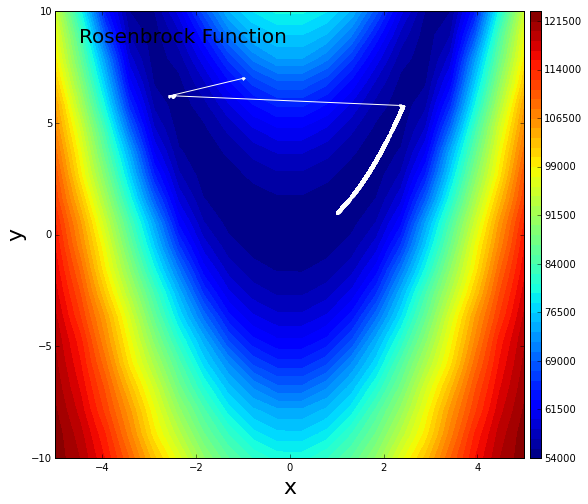

In [12]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_eq, 50)
plt.plot(px,py,'w.-')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('Rosenbrock Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()

## Comparison between these two tests

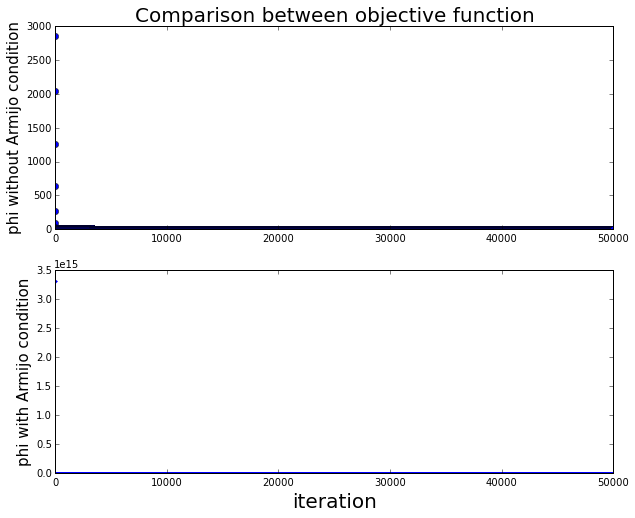

In [13]:
plt.figure(figsize=(10,8))

plt.subplot(2, 1, 1)
plt.plot(it, phi, 'o-')
plt.title('Comparison between objective function',fontsize=20)
plt.ylabel('phi without Armijo condition',fontsize=15)

plt.subplot(2, 1, 2)
plt.plot(it_armi, phi_armi, '.-')
plt.xlabel('iteration',fontsize=20)
plt.ylabel('phi with Armijo condition',fontsize=15)

plt.show()
